# Loading the dataset into python environment

In [152]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
df = pd.read_csv('/content/titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Making ‘PassengerId’ as the index column


In [154]:
DF = df.set_index('PassengerId')
DF.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


# Checking the basic details of the dataset


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are many null values in the dataset

In [156]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Average age of passengers was 30

In [157]:
DF['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Out of 891 passengers onboard, only 342 survived

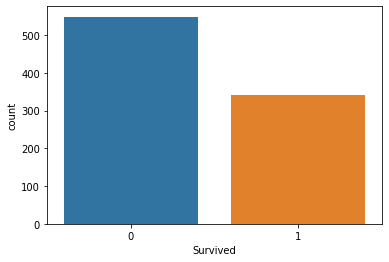

In [158]:
sns.countplot(x="Survived", data=DF)

In [159]:
DF['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

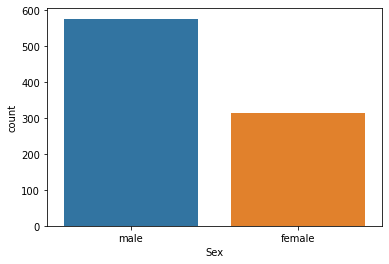

In [160]:
sns.countplot(x="Sex", data=DF)

In [161]:
DF['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

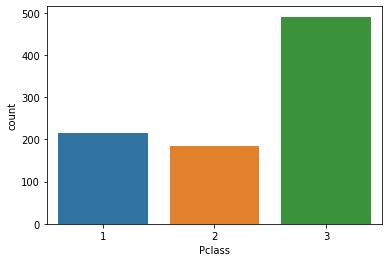

In [162]:
sns.countplot(x="Pclass", data=DF)

Most of the passengers travelled in third class

In [163]:
DF['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

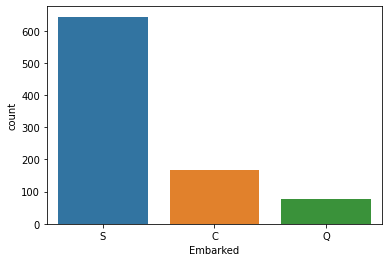

In [164]:
sns.countplot(x="Embarked", data=DF)

Most of the passengers boarded from location "S"

#  Filling in all the missing values present in all the columns in the dataset


In [165]:
for i in ['Age','Embarked','Sex','Cabin']:
  DF[i]= DF[i].fillna(DF[i].mode())

In [166]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     205 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


 # Checking and handling outliers in 3 columns in the dataset

{'boxes': [<matplotlib.lines.Line2D at 0x7f08e6ca02d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f08e6ca53d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f08e6cad410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f08e6ca5e90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f08e6ca0910>,
  <matplotlib.lines.Line2D at 0x7f08e6ca0e50>]}

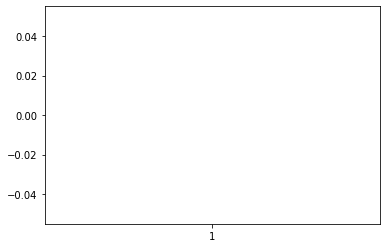

In [167]:
plt.boxplot(DF['Age'])

In [168]:
Q1 = np.percentile(DF['Age'], 25, interpolation = 'midpoint')
Q2 = np.percentile(DF['Age'], 50, interpolation = 'midpoint')
Q3 = np.percentile(DF['Age'], 75, interpolation = 'midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
outlier = []
for i in DF['Age']:
  if((i>up_lim) or (i<low_lim)):
    outlier.append(i)
outlier

[]

In [169]:
ind1 = DF['Age']<low_lim
DF.loc[ind1].index

Int64Index([], dtype='int64', name='PassengerId')

In [170]:
DF.drop([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832], inplace=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f08e6c09450>],
 'caps': [<matplotlib.lines.Line2D at 0x7f08e6c0e510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f08e6c16550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f08e6c0efd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f08e6c09a50>,
  <matplotlib.lines.Line2D at 0x7f08e6c09f90>]}

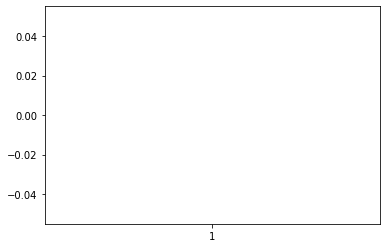

In [171]:
plt.boxplot(DF['Age'])

In [172]:
ind2 = DF['Age']>up_lim
DF.loc[ind2].index

Int64Index([], dtype='int64', name='PassengerId')

In [173]:
DF.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f08e6bf1d90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f08e6bf8e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f08e6b82e90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f08e6b82950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f08e6bf83d0>,
  <matplotlib.lines.Line2D at 0x7f08e6bf8910>]}

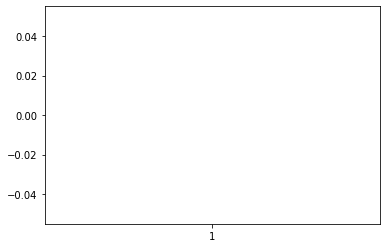

In [174]:
plt.boxplot(DF['Age'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f08e6b61690>],
 'caps': [<matplotlib.lines.Line2D at 0x7f08e6b68710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f08e6b6f750>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f08e6b6f210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f08e6b61c50>,
  <matplotlib.lines.Line2D at 0x7f08e6b681d0>]}

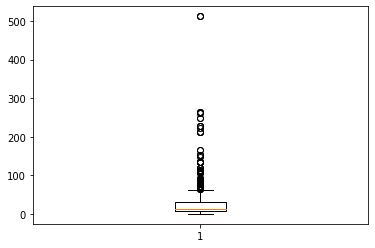

In [175]:
plt.boxplot(DF['Fare'])

In [176]:
Q1 = np.percentile(DF['Fare'], 25, interpolation = 'midpoint')
Q2 = np.percentile(DF['Fare'], 50, interpolation = 'midpoint')
Q3 = np.percentile(DF['Fare'], 75, interpolation = 'midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
outlier = []
for i in DF['Fare']:
  if((i>up_lim) or (i<low_lim)):
    outlier.append(i)
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [177]:
ind3 = DF['Fare']>up_lim
DF.loc[ind3].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)

In [178]:
DF.drop(DF.loc[ind3].index,inplace=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f08e6acccd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f08e6ad3d50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f08e6adad90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f08e6ada850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f08e6ad32d0>,
  <matplotlib.lines.Line2D at 0x7f08e6ad3810>]}

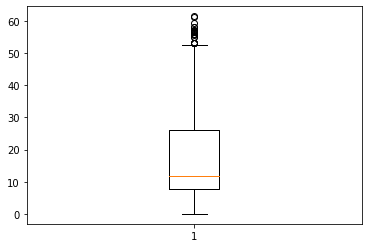

In [179]:
plt.boxplot(DF['Fare'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f08e6a3f090>],
 'caps': [<matplotlib.lines.Line2D at 0x7f08e6a47110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f08e6a50150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f08e6a47bd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f08e6a3f650>,
  <matplotlib.lines.Line2D at 0x7f08e6a3fb90>]}

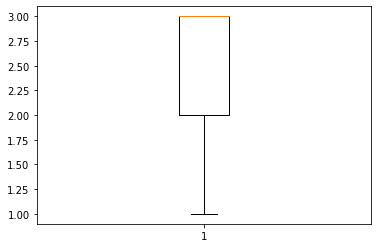

In [180]:
plt.boxplot(DF['Pclass'])

No outliers

{'boxes': [<matplotlib.lines.Line2D at 0x7f08e6a361d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f08e69bc250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f08e69c4290>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f08e69bcd10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f08e6a36790>,
  <matplotlib.lines.Line2D at 0x7f08e6a36cd0>]}

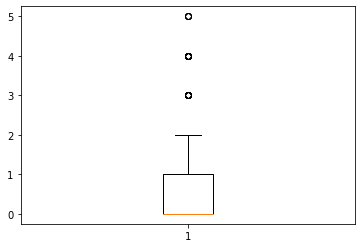

In [181]:
plt.boxplot(DF['SibSp'])

There are a few passengers who have 3/4/5 sibsp. Not truncating these values as this data can be helpful

# Performing min max scaling on the feature set (Take ‘Survived’ as target)


In [182]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
DF['Survived'] = min_max_scaler.fit_transform(DF[['Survived']])
DF['Survived']

PassengerId
1      0.0
3      1.0
4      1.0
5      0.0
6      0.0
      ... 
887    0.0
888    1.0
889    0.0
890    1.0
891    0.0
Name: Survived, Length: 718, dtype: float64